# Exercise II - Matplotlib
Use the Big-Mart Data for some plotting exercises

In [3]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/keuperj/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: False


In [4]:
#import an read big-mart data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

data = pd.read_csv(path+"/DATA/company_sales_data.csv") 


In [43]:
#Test um nur bestimmte Artikel zu bekommen
keyes=(data.keys())                  #die Keyes aus der Excel übergeben
print(keyes)
nur_bestimmte_keyes=(keyes[1:7])     #die gewünschten Keyes übergeben
print(nur_bestimmte_keyes)
for i in nur_bestimmte_keyes:        #Ausgabe der Objekte
    print(i)
    
    
werte=(data['facecream'])
print(werte[0:12])

Index(['month_number', 'facecream', 'facewash', 'toothpaste', 'bathingsoap',
       'shampoo', 'moisturizer', 'total_units', 'total_profit'],
      dtype='object')
Index(['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo',
       'moisturizer'],
      dtype='object')
facecream
facewash
toothpaste
bathingsoap
shampoo
moisturizer
0     2500
1     2630
2     2140
3     3400
4     3600
5     2760
6     2980
7     3700
8     3540
9     1990
10    2340
11    2900
Name: facecream, dtype: int64


In [3]:
#short preview of the data table
data.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


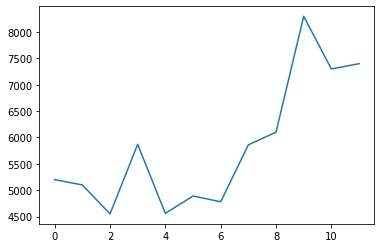

In [4]:
#access data rows by name
plt.plot(data.toothpaste)

## Exercise 1
Read Total profit of all months and show it using a line plot
Total profit data provided for each month. Generated line plot must include the following properties: 

* X label name = Month Number
* Y label name = Total profit


Text(0, 0.5, 'Total profit')

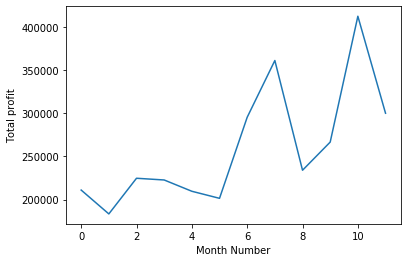

In [5]:
plt.plot(data.total_profit)
plt.xlabel('Month Number')
plt.ylabel('Total profit')

## Exercise 2
Get Total profit of all months and show line plot with the following Style properties
Generated line plot must include following Style properties:

* Line Style dotted and Line color should be red
* Show legend at the lower right location.
* X label name = Month Number
* Y label name = Sold units number
* Add a circle marker.
* Line marker color as read
* Line width should be 3


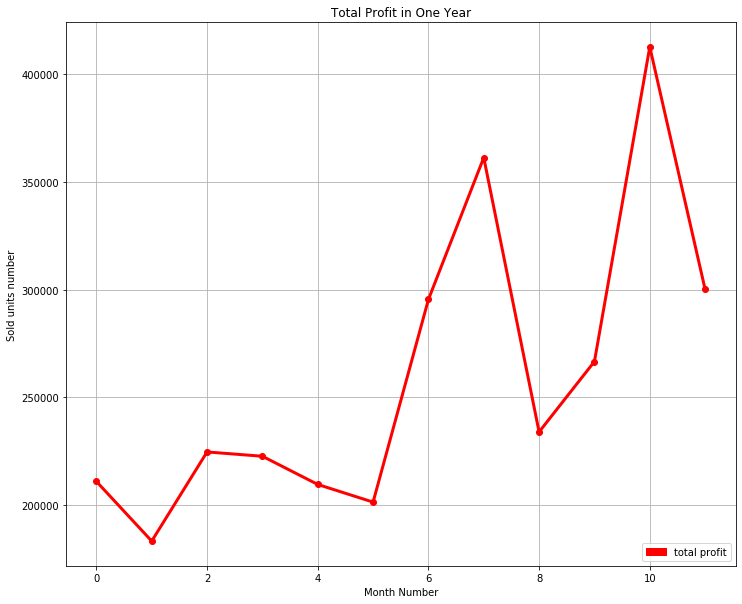

In [61]:
plt.figure(figsize=(12,10))
plt.plot(data.total_profit,color="red",lw=3.00,ls='-',marker='o') #lw - linewidth, ls-linestyle
plt.xlabel('Month Number')
plt.ylabel('Sold units number')
plt.title('Total Profit in One Year')
plt.grid(True)
#Legende
#plt.legend(['Test'], loc=4)
red_patch = mpatches.Patch(color='red',label='total profit') #handler wird erstellt
plt.legend(handles=[red_patch],loc=4)
plt.show()

## Exercise 3
Read all product sales data and show it  using a multiline plot
Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product for each product).

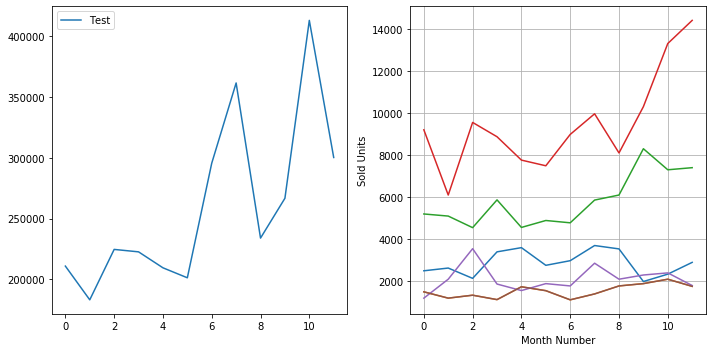

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[1].plot(data.facecream)
ax[1].plot(data.facewash)
ax[1].plot(data.toothpaste)
ax[1].plot(data.bathingsoap)
ax[1].plot(data.shampoo)
ax[1].plot(data.moisturizer)

ax[1].set_xlabel('Month Number')
ax[1].set_ylabel('Sold Units')
ax[1].grid(True)

ax[0].plot(data.total_profit)
ax[0].legend(['Test'])
fig.tight_layout()

## Exercise 4
Read toothpaste sales data of each month and show it using a scatter plot
Also, add a grid in the plot.

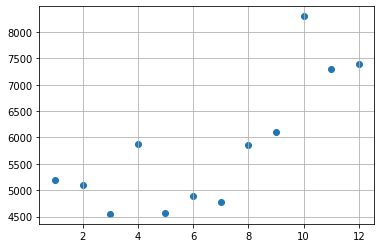

In [59]:
fig, ax = plt.subplots()
ax.scatter(data.month_number,data.toothpaste)
ax.grid(True)

## Exercise 5
Read face cream and facewash product sales data and show it using the bar chart
Bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

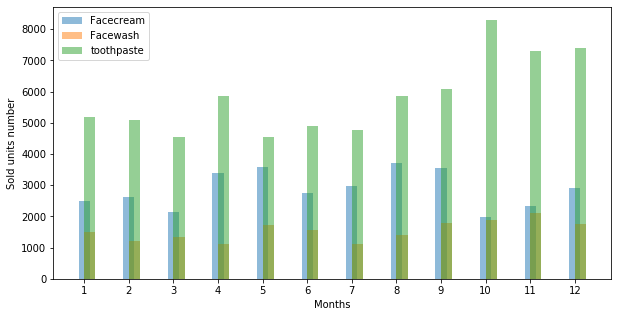

In [102]:
fig, ax = plt.subplots(figsize=(10,5))
x=data.month_number
width=0.25


#ax.bar(x-width/2,data.facecream, width,label="Facecream")
#ax.bar(x+width/2,data.facewash, width,label="Facewash")

ax.bar(x,data.facecream, width,align="center",label="Facecream", alpha=0.5)
ax.bar(x,data.facewash, width,align="edge",label="Facewash", alpha=0.5)
ax.bar(x,data.toothpaste,width, align="edge",label="toothpaste", alpha=0.5)


ax.set_xticks(x)
ax.set_xlabel('Months')
ax.set_ylabel('Sold units number')

ax.legend()

## Exercise 6
Calculate total sale data for last year for each product and show it using a Pie chart
Note: In Pie chart display Number of units sold per year for each product in percentage.

***Note:*** use ``data[item].sum()`` to compute sums over columns 

In [103]:
data['toothpaste'].sum()
facecream
facewash
toothpaste
bathingsoap
shampoo
moisturizer

69910

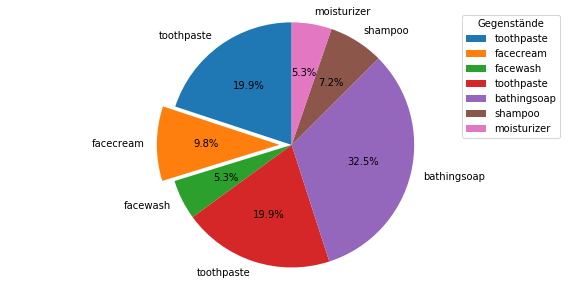

In [144]:
fig, ax = plt.subplots(figsize=(10,5))
a=['toothpaste','facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer']
x=[]
explode=(0,0.1,0,0,0,0,0)
for util in a:
    x.append(data[util].sum())
 
ax.pie(x, explode=explode, labels=a, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.legend(title="Gegenstände")
